In [ ]:
!pip install ibm-watson-machine-learning --upgrade

     |████████████████████████████████| 1.8MB 11.7MB/s 
     |████████████████████████████████| 61kB 6.4MB/s 
     |████████████████████████████████| 829kB 59.1MB/s 
     |████████████████████████████████| 143kB 55.5MB/s 
     |████████████████████████████████| 552kB 54.1MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72555 sha256=47b2055bfb9520dd64f708eefb3c5a5b186b045ea559560331f4fae88ff68255
  Stored in directory: /root/.cache/pip/wheels/a7/10/5b/5d6543382dc5cc86022e490619c8db1253c22d50a57493262b
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=500999 sha256=5fb2d056b6f43f78ebdfb33871b5e36be34d021a7a8899e9795dddfdd3db723b
  Stored in directory: /root/.cache/pip/wheels/4d/69/e0/048f98aadb8f018f13fde51c52af878763eed47d2ee0fb735d
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_sdk_s3transfer-2.7.0-py2.py3-none-any.whl size=88603 sha256=8958d22298dd47a63659566ed18ef492573d02803a3e1b9f

In [ ]:
from getpass import getpass

api_key = getpass("Api Key: ")

Api Key: ··········


In [ ]:
location = "us-south"
wml_credentials = {
    "apikey": api_key,
    "url": 'https://' + location + '.ml.cloud.ibm.com'
}
client = APIClient(wml_credentials)


In [ ]:
#https://us-south.ml.cloud.ibm.com

In [ ]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ---------------  ------------------------
ID                                    NAME             CREATED
e4df72ec-ae13-46a0-9300-58e168d02786  space_blueberry  2021-04-04T13:00:26.752Z
------------------------------------  ---------------  ------------------------


In [ ]:
client.set.default_space("e4df72ec-ae13-46a0-9300-58e168d02786")

'SUCCESS'

In [ ]:
import sys
from getpass import getpass
import sklearn
sys.version
sklearn.__version__

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/My Drive/AOBD_Project"
path

'/content/drive/My Drive/AOBD_Project'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv(path + "/WildBlueberry.csv")

In [ ]:
data.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [ ]:
data.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,388.000000,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,224.444871,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,194.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,388.000000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,582.000000,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [ ]:
corr = data.corr()
corr

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
Row#,1.000000,0.438706,0.192404,0.331999,0.446898,0.288531,-0.018204,-0.029893,-0.023144,-0.016947,-0.022430,-0.024338,-0.025894,-0.036481,-0.075130,-0.077495,-0.078344,-0.024942
clonesize,0.438706,1.000000,0.119745,0.004807,-0.008451,-0.139049,0.034157,0.032854,0.033752,0.034295,0.033768,0.033566,-0.021696,-0.024455,-0.556591,-0.474038,-0.496156,-0.516737
honeybee,0.192404,0.119745,1.000000,-0.233954,-0.125913,-0.189058,0.026359,0.025467,0.026365,0.026477,0.026104,0.025647,-0.073818,-0.093477,-0.009406,-0.166419,-0.170808,-0.044250
bumbles,0.331999,0.004807,-0.233954,1.000000,0.010758,0.293665,-0.022863,-0.005801,-0.015821,-0.024662,-0.016801,-0.013985,0.058063,0.075376,0.289890,0.358202,0.380206,0.309407
andrena,0.446898,-0.008451,-0.125913,0.010758,1.000000,0.387379,-0.026497,-0.023887,-0.025578,-0.026775,-0.025623,-0.025115,0.035297,0.043739,0.102549,0.092470,0.089178,0.140277
osmia,0.288531,-0.139049,-0.189058,0.293665,0.387379,1.000000,-0.063755,-0.043237,-0.055441,-0.065910,-0.056546,-0.053141,0.083667,0.104188,0.334178,0.336136,0.353116,0.380892
MaxOfUpperTRange,-0.018204,0.034157,0.026359,-0.022863,-0.026497,-0.063755,1.000000,0.990961,0.998314,0.999900,0.998842,0.997658,-0.003286,-0.005677,-0.130450,0.058492,-0.034486,-0.187075
MinOfUpperTRange,-0.029893,0.032854,0.025467,-0.005801,-0.023887,-0.043237,0.990961,1.000000,0.997056,0.988988,0.996267,0.997798,-0.000798,-0.001889,-0.119856,0.067671,-0.024240,-0.175883
AverageOfUpperTRange,-0.023144,0.033752,0.026365,-0.015821,-0.025578,-0.055441,0.998314,0.997056,1.000000,0.997413,0.999944,0.999923,-0.002325,-0.004195,-0.125082,0.064034,-0.028925,-0.181774
MaxOfLowerTRange,-0.016947,0.034295,0.026477,-0.024662,-0.026775,-0.065910,0.999900,0.988988,0.997413,1.000000,0.998071,0.996609,-0.003558,-0.006087,-0.130693,0.058487,-0.034674,-0.187439


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

In [ ]:
data = data.drop(['Row#'], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             777 non-null    float64
 1   honeybee              777 non-null    float64
 2   bumbles               777 non-null    float64
 3   andrena               777 non-null    float64
 4   osmia                 777 non-null    float64
 5   MaxOfUpperTRange      777 non-null    float64
 6   MinOfUpperTRange      777 non-null    float64
 7   AverageOfUpperTRange  777 non-null    float64
 8   MaxOfLowerTRange      777 non-null    float64
 9   MinOfLowerTRange      777 non-null    float64
 10  AverageOfLowerTRange  777 non-null    float64
 11  RainingDays           777 non-null    float64
 12  AverageRainingDays    777 non-null    float64
 13  fruitset              777 non-null    float64
 14  fruitmass             777 non-null    float64
 15  seeds                 7

In [ ]:
X = data.drop('yield',axis=1)
Y = data['yield']
SS = StandardScaler()
X = SS.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
print('Train Score: ', regressor.score(X_train, Y_train))  
print('Test Score: ', regressor.score(X_test, Y_test))  

Train Score:  0.9920835488940398
Test Score:  -1.275553237188825


In [ ]:
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(Y_test,y_pred))

329.2287674998951


In [ ]:
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

2080.7556991305614


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, y_pred)
print('r2 score for perfect model is', r2)

r2 score for perfect model is -1.275553237188825


# XGBOOST

In [ ]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=Y)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

[10:59:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.00111619 0.01132601 0.00113598 0.00500647 0.01168767 0.01226971
 0.         0.         0.         0.         0.         0.02149066
 0.         0.7755117  0.00339    0.15706559]


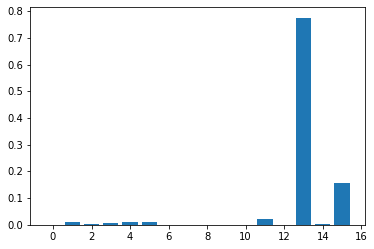

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from xgboost import plot_importance
from matplotlib import pyplot
  
xg_reg = xgb.XGBRegressor(objective ='reg:linear')
xg_reg.fit(X_train,Y_train)
#plot_importance(xg_reg)
print(xg_reg.feature_importances_)
# plot
pyplot.bar(range(len(xg_reg.feature_importances_)), xg_reg.feature_importances_)
pyplot.show()


preds = xg_reg.predict(X_test)

In [ ]:
print('Train Score: ', xg_reg.score(X_train, Y_train))  
print('Test Score: ', xg_reg.score(X_test, Y_test)) 

Train Score:  0.9952433260563245
Test Score:  0.9869738270715963


In [ ]:
#MAE
print(metrics.mean_absolute_error(Y_test,preds))

113.46043250620995


In [ ]:
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_test,preds)))

157.42946236301336


# xg_boost_feature

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             777 non-null    float64
 1   honeybee              777 non-null    float64
 2   bumbles               777 non-null    float64
 3   andrena               777 non-null    float64
 4   osmia                 777 non-null    float64
 5   MaxOfUpperTRange      777 non-null    float64
 6   MinOfUpperTRange      777 non-null    float64
 7   AverageOfUpperTRange  777 non-null    float64
 8   MaxOfLowerTRange      777 non-null    float64
 9   MinOfLowerTRange      777 non-null    float64
 10  AverageOfLowerTRange  777 non-null    float64
 11  RainingDays           777 non-null    float64
 12  AverageRainingDays    777 non-null    float64
 13  fruitset              777 non-null    float64
 14  fruitmass             777 non-null    float64
 15  seeds                 7

In [ ]:
X = data[["honeybee","andrena","osmia","MaxOfUpperTRange","RainingDays","fruitset","seeds"]]
Y = data["yield"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from xgboost import plot_importance
from matplotlib import pyplot
  
xg_reg = xgb.XGBRegressor(objective ='reg:linear')
xg_reg.fit(X_train_xg,y_train_xg)

preds_xg = xg_reg.predict(X_test_xg)

[10:59:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print('Train Score: ', xg_reg.score(X_train_xg, y_train_xg))  
print('Test Score: ', xg_reg.score(X_test_xg, y_test_xg)) 

Train Score:  0.9950813138407734
Test Score:  0.9869285575758853


In [ ]:
# #MAE
print(metrics.mean_absolute_error(y_test_xg,preds_xg))
# #RMSE
print(np.sqrt(metrics.mean_squared_error(y_test_xg,preds_xg)))

113.48385700420673
157.70278021681665


#PCA

Explained Variance: [0.60309981 0.33592675 0.05721854]


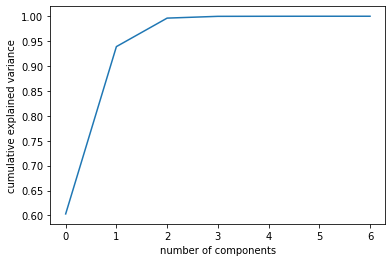

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca = pca.fit(X)
# summarize components
print("Explained Variance: %s" % pca.explained_variance_ratio_)

pca = PCA().fit(X)
pyplot.plot(np.cumsum(pca.explained_variance_ratio_))
pyplot.xlabel('number of components')
pyplot.ylabel('cumulative explained variance');


In [ ]:
X = data[["fruitset","seeds"]]
Y = data["yield"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train_lr, X_test_lr, Y_train_lr, Y_test_lr = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_lr, Y_train_lr)
y_pred_lr = regressor.predict(X_test_lr)

In [ ]:
print('Train Score: ', regressor.score(X_train_lr, Y_train_lr))  
print('Test Score: ', regressor.score(X_test_lr, Y_test_lr))  

Train Score:  0.9693444476970631
Test Score:  0.9719754960265283


In [ ]:
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(Y_test_lr,y_pred_lr))

179.38422867927713


In [ ]:
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_test_lr,y_pred_lr)))

230.91203030155697


In [ ]:
# from sklearn.metrics import r2_score
# r2 = r2_score(Y_test, y_pred)
# print('r2 score for perfect model is', r2)

In [ ]:
# import pickle
# with open('LR_model.pkl', 'wb') as LR_model_file:
#   pickle.dump(regressor, LR_model_file)

In [ ]:
  client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029a-cc97-56da-b8e0-39c3880dbbe7  base
tensorflow_2.1-py3.6           1eb25b8

#LR DEPLOY

In [ ]:
# !pip install scikit-learn==0.23

In [ ]:
sklearn.__version__

'0.22.2.post1'

In [ ]:
software_spec_uid = client.software_specifications.get_uid_by_name("default_py3.7")
software_spec_uid

'e4429883-c883-42b6-87a8-f419d64088cd'

In [ ]:
metadata = {
    client.repository.ModelMetaNames.NAME: 'WBB LR_pred Model',
    client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}
published_model = client.repository.store_model(
    model=regressor,
    meta_props=metadata,
    training_data=X_train,
    training_target=Y_train)

In [ ]:
models_details = client.repository.list_models()

------------------------------------  -----------------  ------------------------  -----------------
ID                                    NAME               CREATED                   TYPE
b8c6f532-4e56-433c-947c-71f3567caa48  WBB LR_pred Model  2021-05-02T10:59:27.002Z  scikit-learn_0.23
4286d845-b125-47a8-a3c1-11d19d81eb28  WBB XG_pred Model  2021-04-06T01:06:48.002Z  xgboost_0.90
9efbeb8b-3987-4c7a-9218-1df786b72ba2  WBB LR_pred Model  2021-04-06T01:06:32.002Z  scikit-learn_0.23
3774bf2f-186a-47c1-87bc-749b891f8ad0  WBB XG_pred Model  2021-04-06T01:05:32.002Z  xgboost_0.90
e843ce6d-70bd-48b3-ad13-387f089ebaef  WBB LR_pred Model  2021-04-06T01:05:05.002Z  scikit-learn_0.23
e2c492ae-3f54-4919-a13b-83d06f36033f  WBB XG_pred Model  2021-04-05T16:36:10.002Z  xgboost_0.90
0f9cd9e8-4127-4136-967a-ed96a2dae268  WBB LR_pred Model  2021-04-05T16:35:47.002Z  scikit-learn_0.23
71c8a0bc-61d5-4943-b760-808bd7ab3d83  WBB XG_pred Model  2021-04-05T11:33:45.002Z  xgboost_0.90
080b8efa-3aa9-48e7-a18e

In [ ]:
metadata = {
    client.deployments.ConfigurationMetaNames.NAME: "Deployment of LR_Model",
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

created_deployment = client.deployments.create("76bb47f3-d68e-42ab-b92d-9f679c92b9ff", meta_props=metadata)



#######################################################################################

Synchronous deployment creation for uid: '76bb47f3-d68e-42ab-b92d-9f679c92b9ff' started

#######################################################################################


initializing
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='6db5790b-13da-40c2-8f68-61a7b328e68b'
------------------------------------------------------------------------------------------------




In [ ]:
client.deployments.list()

------------------------------------  ----------------------  ------  ------------------------
GUID                                  NAME                    STATE   CREATED
6db5790b-13da-40c2-8f68-61a7b328e68b  Deployment of LR_Model  ready   2021-05-02T10:59:37.056Z
a8c3b783-e6a4-430c-8677-03a9f83e7126  Deployment of XG_Model  ready   2021-04-06T01:07:00.173Z
ce636332-9a0d-4acb-853c-0ee2c71096ad  Deployment of LR_Model  ready   2021-04-06T01:06:37.354Z
c779eb12-162f-42ad-be9a-d4d947d4a236  Deployment of XG_Model  ready   2021-04-06T01:05:40.675Z
0dd390ce-2c46-4cbd-ae0c-2c2fb726f8e4  Deployment of LR_Model  ready   2021-04-06T01:05:17.980Z
f4554129-4e67-4711-8630-da8ff2f62330  Deployment of XG_Model  ready   2021-04-05T16:36:15.748Z
d15674bd-5ef6-4164-9d7e-13c866f5f313  Deployment of LR_Model  ready   2021-04-05T16:36:00.457Z
e05e70b3-b5bc-45be-8818-c5da81fdd24c  Deployment of XG_Model  ready   2021-04-05T11:34:20.304Z
c7e63436-d1c8-4d3f-af39-26a651c45456  Deployment of XG_Model  ready

In [ ]:
X_test_lr.head()

,fruitset,seeds
150,0.556295,38.868110
122,0.411591,31.004606
546,0.539904,38.341781
14,0.381314,30.793741
542,0.402948,31.702301


In [ ]:
Y_test_lr.head()

150    6795.881873
122    4357.822918
546    7293.536170
14     3900.344042
542    4387.741853
Name: yield, dtype: float64

In [ ]:
scoring_payload = {"input_data": [{"values": [[0.556295,38.868110]]}]}
predictions = client.deployments.score("c5d3bbd0-ac98-4e3a-aa4c-557c59c0919f", scoring_payload)

In [ ]:
predictions

{'predictions': [{'fields': ['prediction'], 'values': [[6915.17016524095]]}]}

# **DEPLOY** XG_BOOST

In [ ]:
xgb.__version__

'0.90'

In [ ]:
software_spec_uid_xg = client.software_specifications.get_uid_by_name("default_py3.7")
software_spec_uid_xg

'e4429883-c883-42b6-87a8-f419d64088cd'

In [ ]:
metadata = {
    client.repository.ModelMetaNames.NAME: 'WBB XG_pred Model',
    client.repository.ModelMetaNames.TYPE: 'xgboost_0.90',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid_xg
}
published_model = client.repository.store_model(
    model=xg_reg,
    meta_props=metadata,
    training_data=X_train_xg,
    training_target=y_train_xg)

In [ ]:
y_train_xg.head()

436    8655.676437
230    7626.617335
118    7945.187841
253    7103.508943
157    6376.662565
Name: yield, dtype: float64

In [ ]:
models_details = client.repository.list_models()

------------------------------------  -----------------  ------------------------  -----------------
ID                                    NAME               CREATED                   TYPE
79404af6-e9b6-4598-93e9-b6d5443f4228  WBB XG_pred Model  2021-05-02T10:59:53.002Z  xgboost_0.90
b8c6f532-4e56-433c-947c-71f3567caa48  WBB LR_pred Model  2021-05-02T10:59:27.002Z  scikit-learn_0.23
4286d845-b125-47a8-a3c1-11d19d81eb28  WBB XG_pred Model  2021-04-06T01:06:48.002Z  xgboost_0.90
9efbeb8b-3987-4c7a-9218-1df786b72ba2  WBB LR_pred Model  2021-04-06T01:06:32.002Z  scikit-learn_0.23
3774bf2f-186a-47c1-87bc-749b891f8ad0  WBB XG_pred Model  2021-04-06T01:05:32.002Z  xgboost_0.90
e843ce6d-70bd-48b3-ad13-387f089ebaef  WBB LR_pred Model  2021-04-06T01:05:05.002Z  scikit-learn_0.23
e2c492ae-3f54-4919-a13b-83d06f36033f  WBB XG_pred Model  2021-04-05T16:36:10.002Z  xgboost_0.90
0f9cd9e8-4127-4136-967a-ed96a2dae268  WBB LR_pred Model  2021-04-05T16:35:47.002Z  scikit-learn_0.23
71c8a0bc-61d5-4943-b760

In [ ]:
metadata = {
    client.deployments.ConfigurationMetaNames.NAME: "Deployment of XG_Model",
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

created_deployment = client.deployments.create("71c8a0bc-61d5-4943-b760-808bd7ab3d83", meta_props=metadata)



#######################################################################################

Synchronous deployment creation for uid: '71c8a0bc-61d5-4943-b760-808bd7ab3d83' started

#######################################################################################


initializing
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='b09281c0-0fde-44ab-8acb-33e3c9475498'
------------------------------------------------------------------------------------------------




In [ ]:
client.deployments.list()

------------------------------------  ----------------------  ------  ------------------------
GUID                                  NAME                    STATE   CREATED
b09281c0-0fde-44ab-8acb-33e3c9475498  Deployment of XG_Model  ready   2021-05-02T11:00:01.532Z
6db5790b-13da-40c2-8f68-61a7b328e68b  Deployment of LR_Model  ready   2021-05-02T10:59:37.056Z
a8c3b783-e6a4-430c-8677-03a9f83e7126  Deployment of XG_Model  ready   2021-04-06T01:07:00.173Z
ce636332-9a0d-4acb-853c-0ee2c71096ad  Deployment of LR_Model  ready   2021-04-06T01:06:37.354Z
c779eb12-162f-42ad-be9a-d4d947d4a236  Deployment of XG_Model  ready   2021-04-06T01:05:40.675Z
0dd390ce-2c46-4cbd-ae0c-2c2fb726f8e4  Deployment of LR_Model  ready   2021-04-06T01:05:17.980Z
f4554129-4e67-4711-8630-da8ff2f62330  Deployment of XG_Model  ready   2021-04-05T16:36:15.748Z
d15674bd-5ef6-4164-9d7e-13c866f5f313  Deployment of LR_Model  ready   2021-04-05T16:36:00.457Z
e05e70b3-b5bc-45be-8818-c5da81fdd24c  Deployment of XG_Model  ready

In [ ]:
data.head(5)

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [ ]:
X_train_xg.head()

,honeybee,andrena,osmia,MaxOfUpperTRange,RainingDays,fruitset,seeds
436,0.25,0.50,0.75,86.0,1.0,0.644329,45.619797
230,0.25,0.50,0.63,94.6,1.0,0.595713,41.315912
118,0.25,0.25,0.75,94.6,1.0,0.609613,42.502482
253,0.25,0.50,0.75,69.7,16.0,0.552359,38.042756
157,0.25,0.38,0.38,69.7,16.0,0.520637,35.891310


In [ ]:
X_test_xg.head()

,honeybee,andrena,osmia,MaxOfUpperTRange,RainingDays,fruitset,seeds
150,0.25,0.38,0.38,94.6,1.0,0.556295,38.868110
122,0.25,0.25,0.75,94.6,34.0,0.411591,31.004606
546,0.50,0.50,0.75,77.4,1.0,0.539904,38.341781
14,0.25,0.25,0.25,94.6,1.0,0.381314,30.793741
542,0.50,0.50,0.75,86.0,34.0,0.402948,31.702301


In [ ]:
y_test_xg.head()

150    6795.881873
122    4357.822918
546    7293.536170
14     3900.344042
542    4387.741853
Name: yield, dtype: float64

In [ ]:
def get_prediction(x, describe=False):
    scoring_payload = {"input_data": [{"values": [list(x)]}]}
    predictions = client.deployments.score("f4554129-4e67-4711-8630-da8ff2f62330", scoring_payload)
    probability = np.round(predictions['predictions'][0]['values'][0][1], 0)
    if describe:
        print(f"The prediction is {probability}.")
    return probability

In [ ]:
predictions = get_prediction(X_test_xg.iloc[0], describe=True)

ConnectionError: ignored

In [ ]:
# scoring_payload = {"input_data": [{"values": [[0.25, 0.38, 0.38, 94.6, 1.0, 0.556294925, 38.86811018]]}]}
# predictions = client.deployments.score("e05e70b3-b5bc-45be-8818-c5da81fdd24c", scoring_payload)

In [ ]:
# predictions